In [29]:
import numpy as np
import pandas as pd

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [32]:
df = pd.read_csv('/content/winequality-red.csv')

In [33]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
df.shape

(1599, 12)

In [37]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [38]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [39]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [40]:
df.duplicated().sum()

240

In [41]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [42]:
#df.rename(columns = { 'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace = True)
#df['Sex'].replace({'M': 'Male', 'F': 'Female'},inplace = True)
#df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
#df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

In [43]:
#age_values = df['Age'].value_counts()
#top_age = age_values.head(5)
#df_2 = pd.DataFrame({'Age' : top_age.index, 'Count': top_age.values})
#df

In [44]:
#df.head(5)

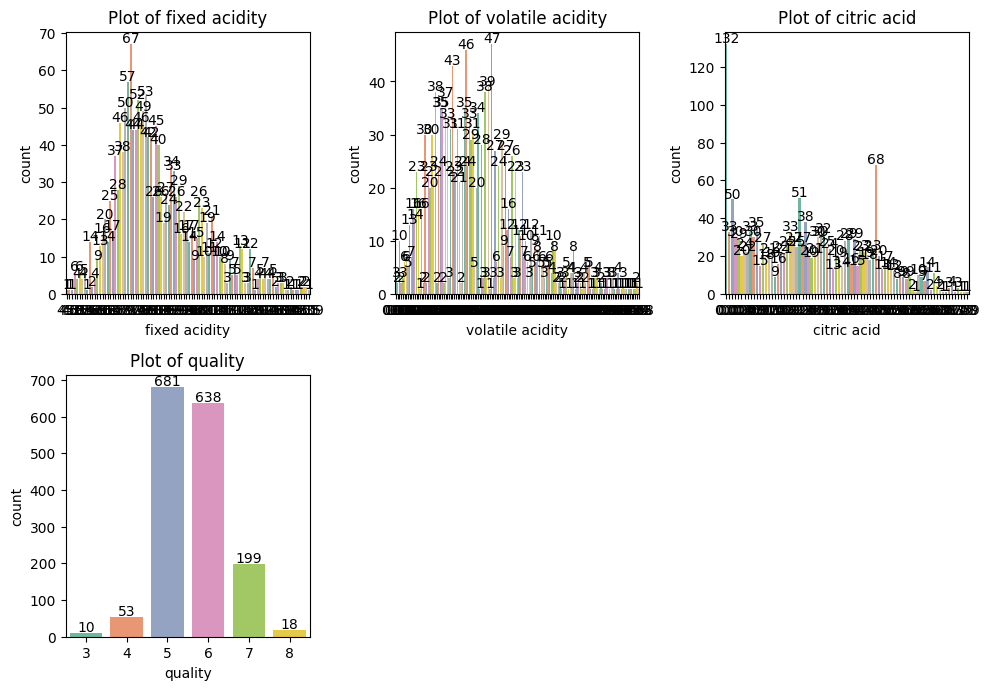

In [45]:
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline',
                    fontsize=10, color='black',
                    xytext=(0, 1),
                    textcoords='offset points')
# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configurations
plot_configs = [
    {'x': 'fixed acidity', 'data': df, 'plot_type': 'count'},
    {'x': 'volatile acidity', 'data': df, 'plot_type': 'count'},
    {'x': 'citric acid', 'data': df, 'plot_type': 'count'},
    {'x': 'quality', 'data': df, 'plot_type': 'count'}
    #{'x': 'chlorides', 'y': 'Count', 'data': df, 'plot_type': 'bar'}
]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i + 1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

In [46]:
## Checking outiers detection through box plot.
#plt.figure(figsize=(5, 5))
#sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
#plt.title('Boxplot of Sex by Sodium_to_Potassium')
#plt.show()

In [47]:
#df = df.drop(['quality'], axis=1)

In [48]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [49]:
## Since sex, Blood Pressure and cholesterol are all in object type we nee to encode them for better prediction.

#labelled_encoder_sex = LabelEncoder()
#labelled_encoder_blood_pressure = LabelEncoder()
#labelled_encoder_cholesterol = LabelEncoder()
#X['Sex'] = labelled_encoder_sex.fit_transform(X['Sex'])
#X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
#X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)
accuracy = dtc.score(X_test,y_test)
print('The accuaracy of this model is :', accuracy*100)

The accuaracy of this model is : 54.37499999999999


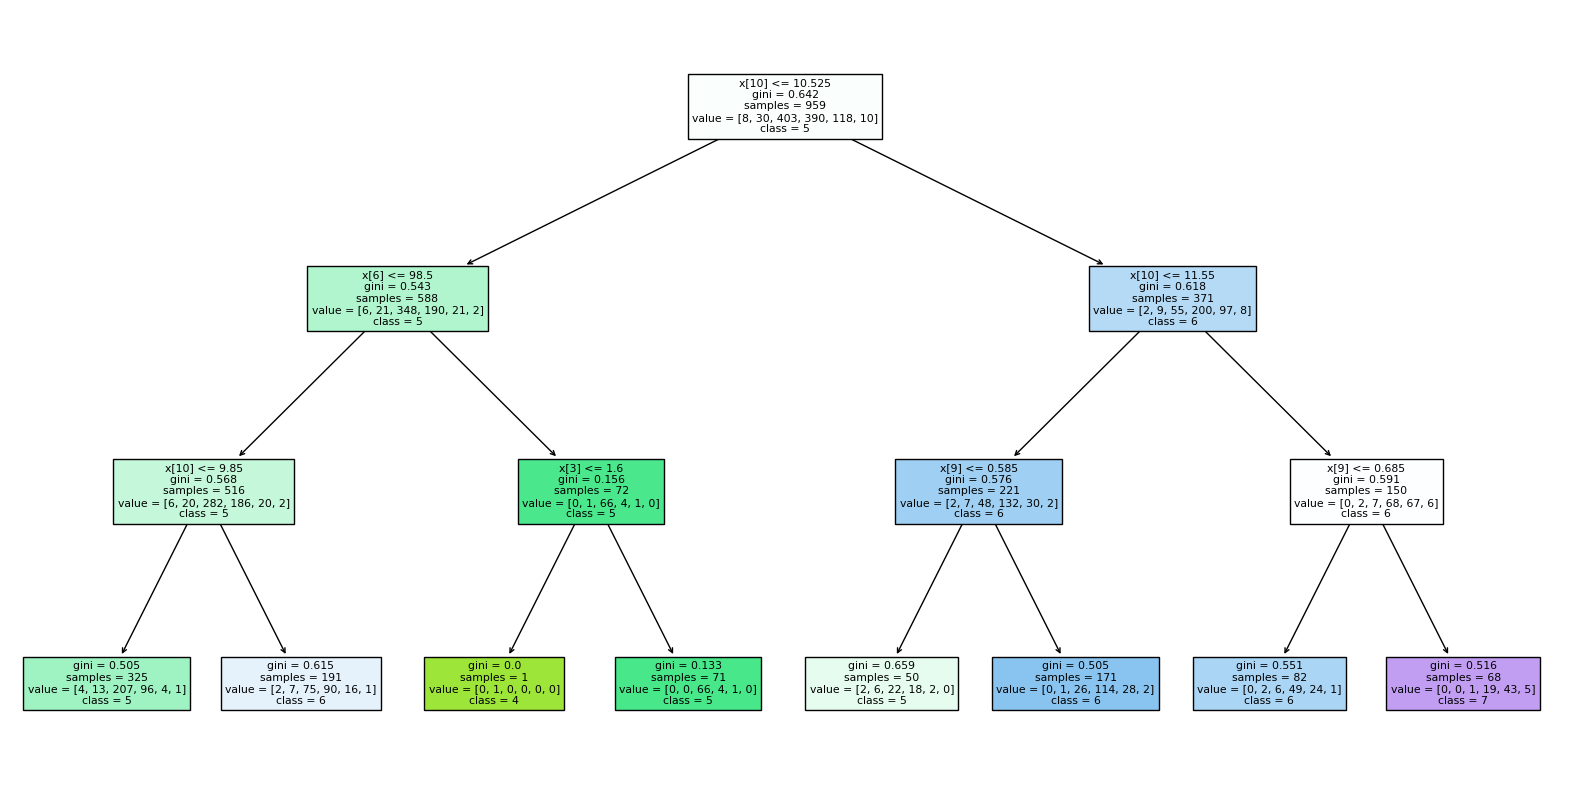

In [51]:
from sklearn.tree import plot_tree
#unique_classes = np.unique(y_train)
unique_classes = ['3', '4', '5', '6', '7', '8']
plt.figure(figsize=(20,10))
plot_tree(dtc, class_names=unique_classes, filled=True)
plt.show()

In [52]:
df.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.9966,3.36,0.78,11.0,5


In [56]:
## Prediction
X = np.array(['7.3','0.835','0.03','2.1', '0.092', '10.0', '19.0', '0.9966', '3.39', '0.47', '9.6'])
label = LabelEncoder()
X = label.fit_transform(X)
y_pred = dtc.predict(X.reshape(1,-1))
y_pred

array([6])